In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

df['rooms_per_household'] = df['total_rooms'] / (df['households'] + 1e-6)
df['bedrooms_per_room'] = df['total_bedrooms'] / (df['total_rooms'] + 1e-6)
df['population_per_household'] = df['population'] / (df['households'] + 1e-6)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,6.281853,0.172096,2.181467


In [3]:
X_simple = df[['median_income']]     # simple linear regression
y = df['median_house_value']


In [4]:
feature_list = ['median_income','housing_median_age','total_rooms','rooms_per_household','bedrooms_per_room']
X_multi = df[feature_list]


In [5]:
from sklearn.model_selection import train_test_split

X = X_multi.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)   # for simple regression, use X_simple instead (no scaling required)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MAE:", round(mae,2))
print("MSE:", round(mse,2))
print("R2 :", round(r2,4))


MAE: 59465.52
MSE: 7644791007.73
R2 : 0.4166


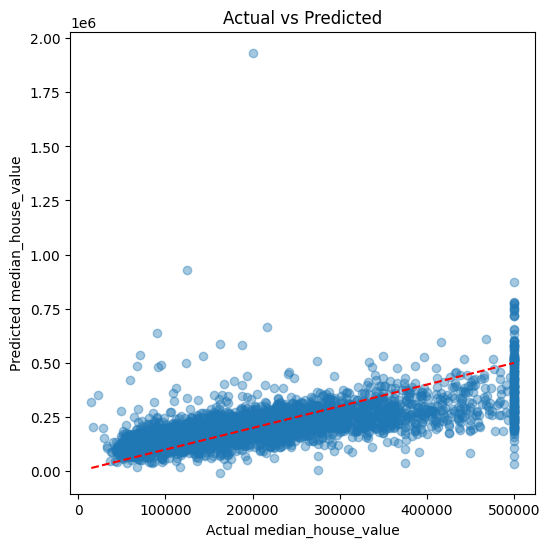

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Actual vs Predicted")
plt.show()


In [10]:
coeffs = pd.Series(model.coef_, index = X.columns)
print("Intercept:", model.intercept_)
print("Coefficients:")
print(coeffs.sort_values(ascending=False).round(3))


Intercept: 207194.6937378876
Coefficients:
median_income          99303.661
bedrooms_per_room      30448.335
housing_median_age     23673.525
total_rooms            10022.932
rooms_per_household      651.581
dtype: float64


In [11]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
results.to_csv("task3_predictions.csv", index=True)

# Save model with joblib (optional)
import joblib
joblib.dump(model, "linear_model_task3.pkl")


['linear_model_task3.pkl']